In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## Importing Data file and understanding the data

In [2]:
#Reading data from CSV file
help_ngo = pd.read_csv("Country-data.csv")
help_ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
help_ngo.shape

(167, 10)

#### Adding derived metric for export import ratio 

In [4]:
help_ngo['exp_imp_ratio'] = round(help_ngo['exports']/help_ngo['imports'],2)
help_ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,exp_imp_ratio
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0.22
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.58
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1.22
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1.45
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0.77


In [5]:
help_ngo.index

RangeIndex(start=0, stop=167, step=1)

In [6]:
help_ngo.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,exp_imp_ratio
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689,0.922754
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809,0.444005
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000,0.080000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000,0.650000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000,0.890000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000,1.135000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000,1.384000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000,1.581000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000,2.620000


In [7]:
help_ngo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 11 columns):
country          167 non-null object
child_mort       167 non-null float64
exports          167 non-null float64
health           167 non-null float64
imports          167 non-null float64
income           167 non-null int64
inflation        167 non-null float64
life_expec       167 non-null float64
total_fer        167 non-null float64
gdpp             167 non-null int64
exp_imp_ratio    167 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 14.4+ KB


In [8]:
#Checking for missing values
help_ngo.isnull().sum().sort_values(ascending= False)

exp_imp_ratio    0
gdpp             0
total_fer        0
life_expec       0
inflation        0
income           0
imports          0
health           0
exports          0
child_mort       0
country          0
dtype: int64

In [9]:
# Check Duplicates
help_ngo.duplicated().sum()

0

In [10]:
#Looking into all countries
print(help_ngo.country.unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati'
 'Kuwait' 'Kyrgyz Republic' 'Lao' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia'
 '

## EDA

### Looking for relations and patterns of the data using  pairplot

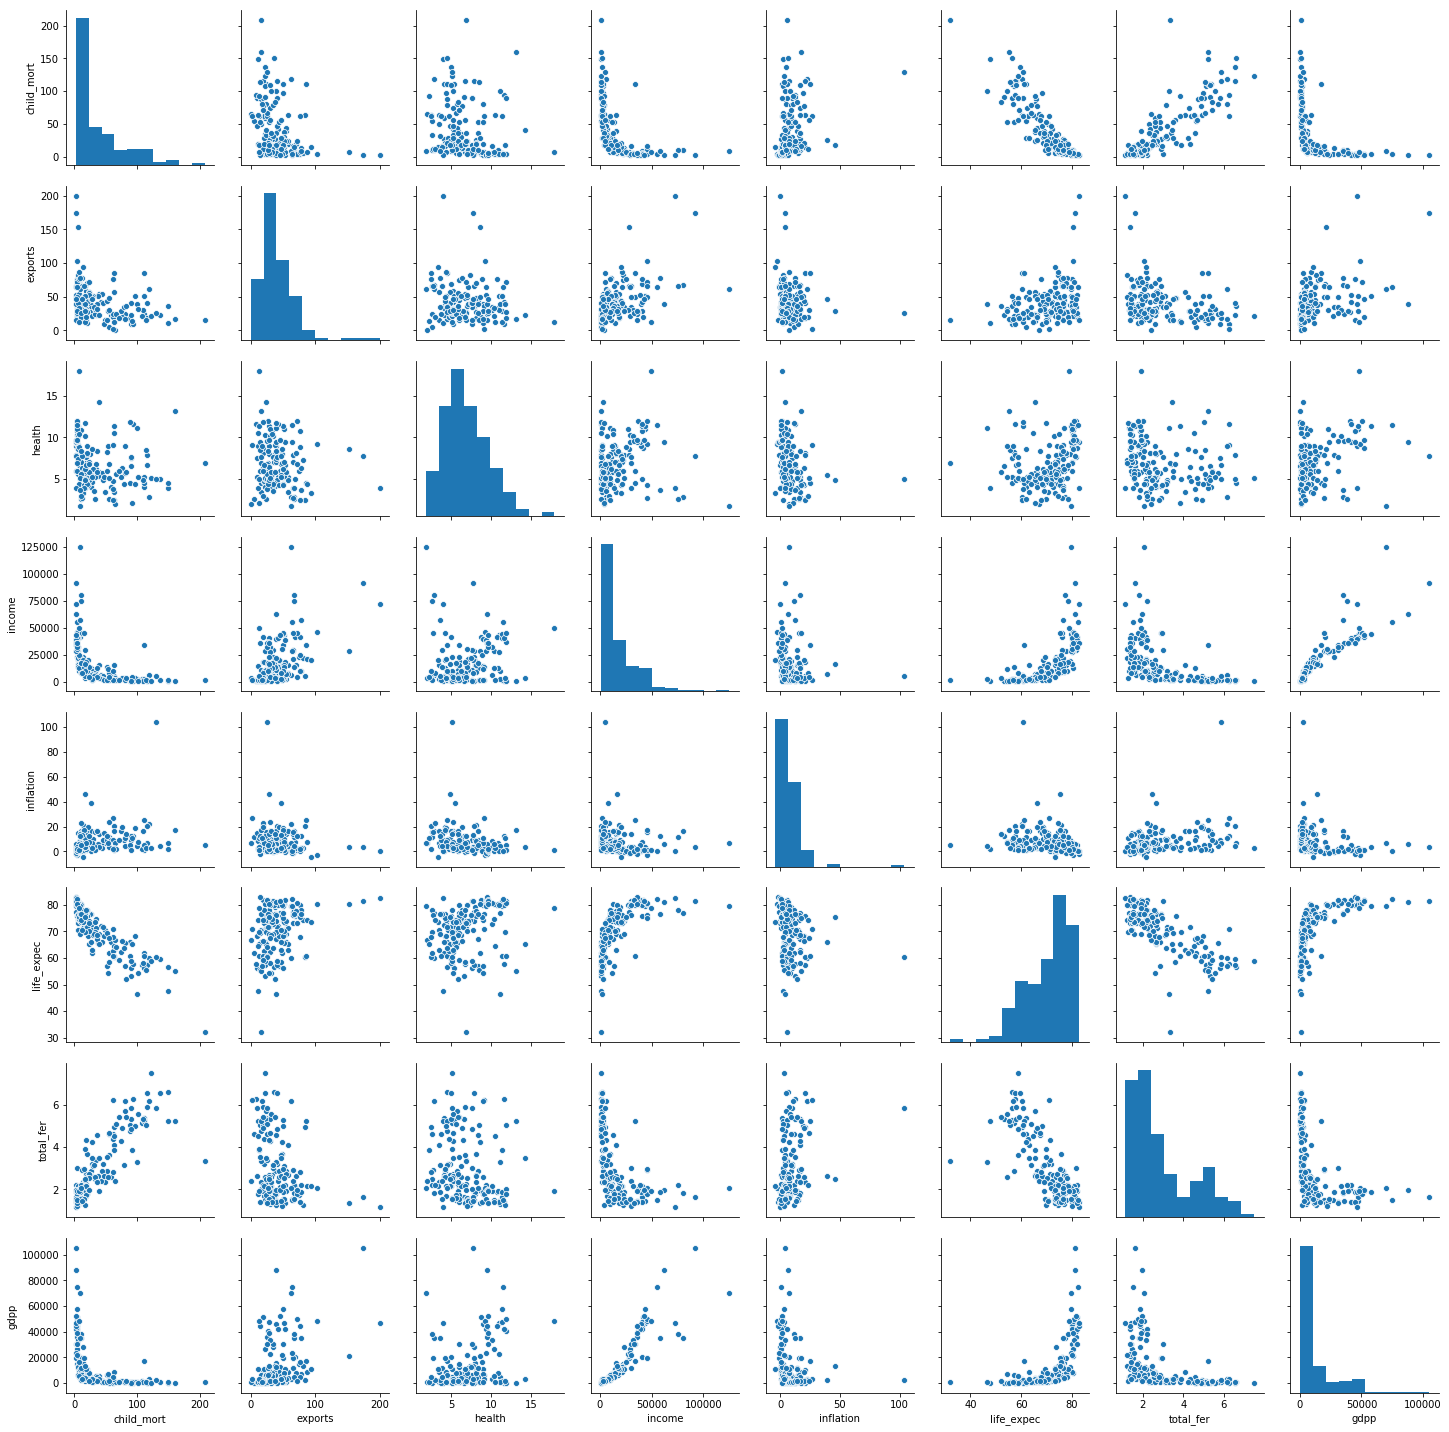

In [11]:
sns.pairplot(help_ngo[['child_mort','exports','health','income','inflation','life_expec','total_fer','gdpp']])
plt.show()

## NORMALISING the data

In [12]:
help_ngo.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'exp_imp_ratio'],
      dtype='object')

In [13]:
#Removing country column for normalising
help_ngo_pca = help_ngo.loc[:, help_ngo.columns != 'country']
help_ngo_pca.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,exp_imp_ratio
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0.22
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.58
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1.22
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1.45
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0.77


In [14]:
# Normalising continuous features
normalized_df=(help_ngo_pca-help_ngo_pca.mean())/help_ngo_pca.std()
help_ngo_pca = help_ngo_pca.drop(['child_mort','health','exports','imports','income','inflation','life_expec','total_fer','gdpp','exp_imp_ratio'], 1)
help_ngo_pca = pd.concat([help_ngo_pca,normalized_df],axis=1)
help_ngo_pca.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,exp_imp_ratio
0,1.287660,-1.134867,0.278251,-0.082208,-0.805822,0.156864,-1.614237,1.897176,-0.677143,-1.582762
1,-0.537333,-0.478220,-0.096725,0.070624,-0.374243,-0.311411,0.645924,-0.857394,-0.484167,-0.771961
2,-0.272015,-0.098824,-0.963176,-0.639838,-0.220182,0.786908,0.668413,-0.038289,-0.463980,0.669464
3,2.001787,0.773056,-1.443729,-0.164820,-0.583289,1.382894,-1.175698,2.121770,-0.514720,1.187476
4,-0.693548,0.160186,-0.286034,0.496076,0.101427,-0.599944,0.702147,-0.540321,-0.041692,-0.344038


### Diving deep to find correlations between various variables

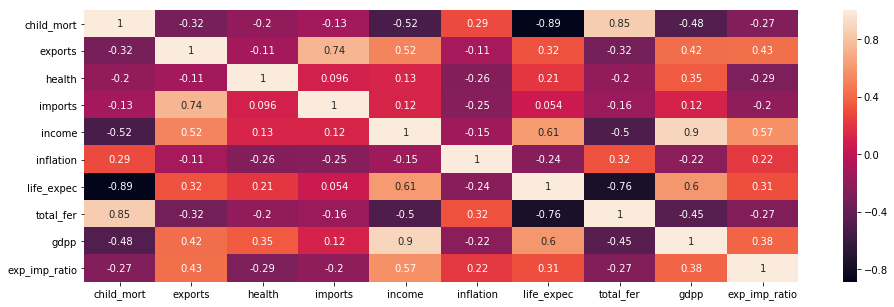

In [15]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Size of the figure
plt.figure(figsize = (16, 5))     
sns.heatmap(help_ngo_pca.corr(),annot = True)

In [16]:
type(help_ngo_pca)

pandas.core.frame.DataFrame

### Dropping highly correlated variables

In [17]:
help_ngo_pca_a = help_ngo_pca.drop(['life_expec','gdpp','total_fer'],1)

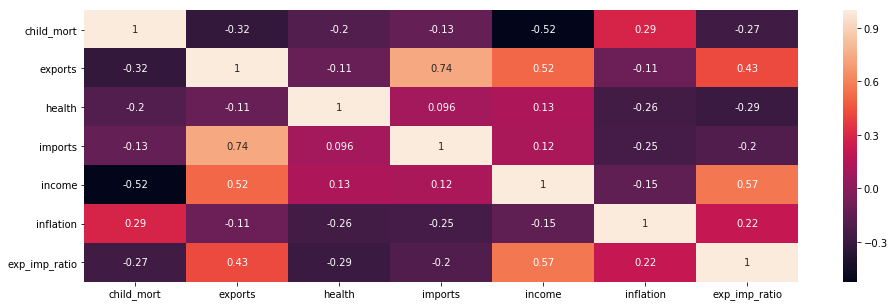

In [18]:
# Checking the correlations after dropping hifghy correlated variables
plt.figure(figsize = (16, 5))     
sns.heatmap(help_ngo_pca_a.corr(),annot = True)

### Oultiers were not removed before PCA as more than half of the data got vanished in doing so

## Applying PCA

In [19]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [20]:
#Doing the PCA on the train data
pca.fit(help_ngo_pca_a)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [21]:
pca.components_

array([[-0.42593374,  0.53881338,  0.04728387,  0.33076799,  0.51465026,
        -0.18433746,  0.3431795 ],
       [ 0.08135923,  0.0102008 , -0.4794401 , -0.39527585,  0.15097016,
         0.50290447,  0.57573077],
       [ 0.40770173,  0.42582125, -0.435453  ,  0.57385712, -0.28268655,
         0.19286023, -0.12813077],
       [ 0.14385493,  0.0925257 ,  0.66131983,  0.15273058,  0.12393713,
         0.70323554, -0.01317441],
       [ 0.78623685,  0.0629186 ,  0.21141094, -0.09902016,  0.31339054,
        -0.39677251,  0.26025224],
       [-0.08191855,  0.20293906,  0.30757079, -0.03461826, -0.71747385,
        -0.1546589 ,  0.56357677],
       [-0.01292845, -0.68887469, -0.04054402,  0.60885753,  0.06394272,
        -0.0048671 ,  0.38577305]])

In [22]:
colnames = list(help_ngo_pca_a.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,PC1,PC2,Feature
0,-0.425934,0.081359,child_mort
1,0.538813,0.010201,exports
2,0.047284,-0.479440,health
3,0.330768,-0.395276,imports
4,0.514650,0.150970,income
5,-0.184337,0.502904,inflation
6,0.343180,0.575731,exp_imp_ratio


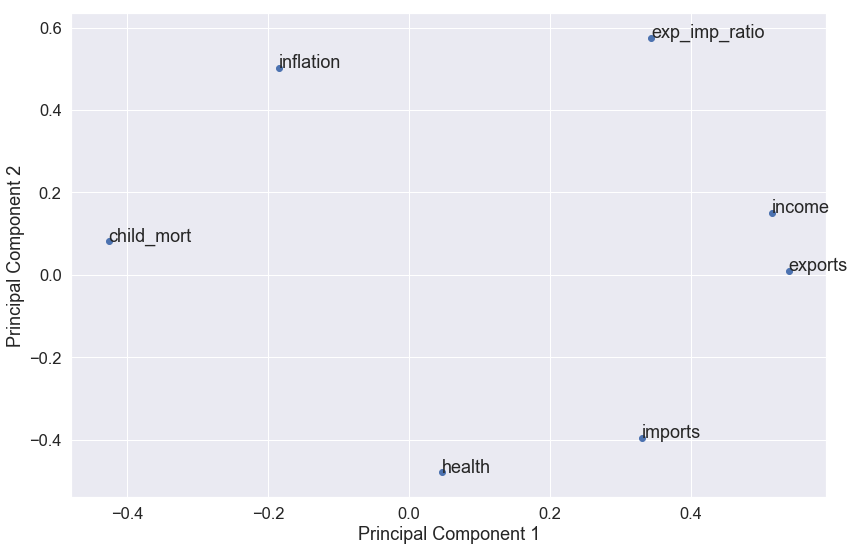

In [23]:
fig = plt.figure(figsize = (12,8))
sns.set(font_scale = 1.5)
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

### here we can notice that that the economic variables seem to move to the extreme ends of the graph depecting that these PC's are inclined towards defining the economic factors

### Plotting the screeplot to assess the number of needed principal components

In [24]:
pca.explained_variance_ratio_

array([0.35656017, 0.24096511, 0.18374587, 0.10299146, 0.07060132,
       0.03826429, 0.00687178])

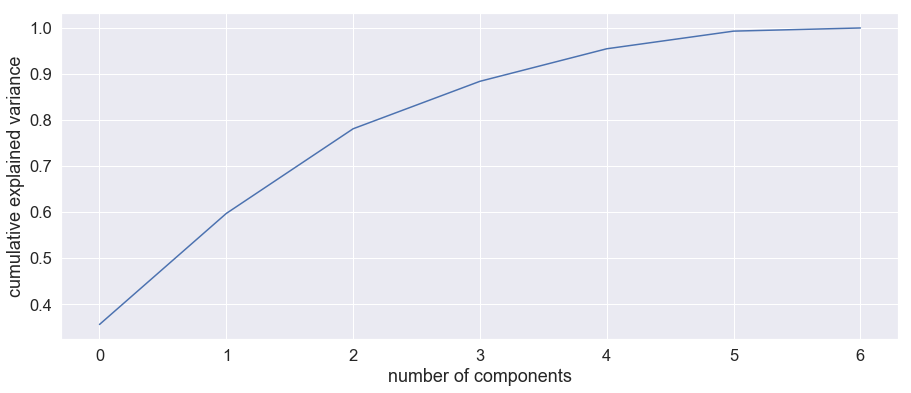

In [25]:
#Making the screeplot - plotting the cumulative variance against the number of components
fig = plt.figure(figsize = (15,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### Clearly 95% of variance can be defined by 4 Principal Components

In [26]:
#Using PCA 
from sklearn.decomposition import PCA
pca_final = PCA(n_components=4)

In [27]:
help_ngo_pca_a = pca_final.fit_transform(help_ngo_pca_a)
help_ngo_pca_a.shape

(167, 4)

In [28]:
help_ngo_pca_a

array([[-2.16077787e+00, -9.61735744e-01,  3.34238317e-01,
         2.82982762e-01],
       [-4.10137336e-01, -6.87688311e-01, -1.95413583e-01,
        -4.29933225e-01],
       [-2.23195380e-01,  1.43948835e+00,  2.74868224e-02,
        -2.65691954e-01],
       [-7.06469554e-01,  2.21915147e+00,  1.95885017e+00,
         2.64120043e-01],
       [ 5.77001963e-01, -5.98218360e-01,  9.43850995e-02,
        -6.03142023e-01],
       [-5.73840877e-01,  1.19381176e+00, -1.37881532e+00,
         8.29654194e-01],
       [-8.85777423e-01, -2.83043942e-01,  1.12355691e-01,
        -7.86327876e-01],
       [ 3.96556052e-01, -7.49913825e-02, -2.07326422e+00,
        -1.79797830e-01],
       [ 1.57341407e+00, -7.43649394e-01, -1.37748537e+00,
         6.29882555e-01],
       [ 1.05185172e+00,  3.07584560e+00, -6.21364403e-01,
        -7.06148312e-06],
       [ 3.14590447e-01, -6.90086689e-01, -7.86322125e-01,
        -3.72587033e-01],
       [ 1.88558977e+00,  9.58659747e-01,  4.21497500e-02,
      

In [29]:
help_ngo_pca_out = pd.DataFrame(help_ngo_pca_a)

In [30]:
help_ngo_pca_out.shape

(167, 4)

In [31]:
help_ngo_pca_out.head()

,0,1,2,3
0,-2.160778,-0.961736,0.334238,0.282983
1,-0.410137,-0.687688,-0.195414,-0.429933
2,-0.223195,1.439488,0.027487,-0.265692
3,-0.706470,2.219151,1.958850,0.264120
4,0.577002,-0.598218,0.094385,-0.603142


In [32]:
help_ngo_pca_out.columns = ['PC1','PC2','PC3','PC4']

In [33]:
help_ngo_pca_out.head()

,PC1,PC2,PC3,PC4
0,-2.160778,-0.961736,0.334238,0.282983
1,-0.410137,-0.687688,-0.195414,-0.429933
2,-0.223195,1.439488,0.027487,-0.265692
3,-0.706470,2.219151,1.958850,0.264120
4,0.577002,-0.598218,0.094385,-0.603142


In [34]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(help_ngo_pca_out.transpose())

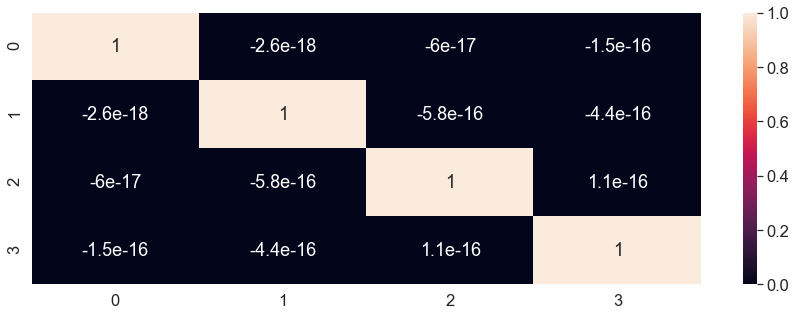

In [35]:
plt.figure(figsize = (15,5))
sns.heatmap(corrmat,annot = True)

In [36]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 1.0582990888920931e-16 , min corr:  -5.793871965488169e-16


### It's very clear that there is no relation between any principal component as max and min correlation are very very close to 0

## Outlier Treatment

### Plotting Box plots to find outliers

Text(731.147,0.5,'PC3')

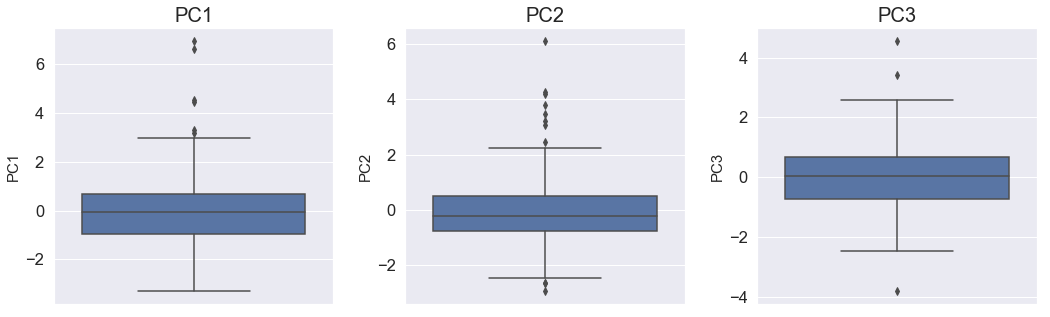

In [37]:
# Checking outliers 
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.tight_layout()
sns.set(font_scale = 1.5)
PC1 = sns.boxplot(y=help_ngo_pca_out['PC1'])
PC1.axes.set_title("PC1",fontsize=20)
PC1.set_ylabel("PC1",fontsize=15)

plt.subplot(1,3,2)
plt.tight_layout()
sns.set(font_scale = 1.5)
PC2 = sns.boxplot(y=help_ngo_pca_out['PC2'])
PC2.axes.set_title("PC2",fontsize=20)
PC2.set_ylabel("PC2",fontsize=15)


plt.subplot(1,3,3)
plt.tight_layout()
sns.set(font_scale = 1.5)
PC3 = sns.boxplot(y=help_ngo_pca_out['PC3'])
PC3.axes.set_title("PC3",fontsize=20)
PC3.set_ylabel("PC3",fontsize=15)

In [38]:
# Inspecting the variations of outliers
help_ngo_pca_out.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,PC1,PC2,PC3,PC4
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,1.143463e-16,1.595530e-17,-2.227094e-17,-3.274161e-17
std,1.579848e+00,1.298752e+00,1.134117e+00,8.490820e-01
min,-3.303111e+00,-2.966880e+00,-3.804698e+00,-1.664452e+00
25%,-9.657338e-01,-7.642880e-01,-7.352106e-01,-4.984501e-01
50%,-6.582343e-02,-2.500087e-01,4.214975e-02,-1.096851e-01
75%,6.697513e-01,4.989063e-01,6.644205e-01,3.890605e-01
90%,1.740566e+00,1.577375e+00,1.198502e+00,8.671691e-01
95%,2.336011e+00,2.217079e+00,1.941093e+00,1.392838e+00
99%,5.240954e+00,4.224016e+00,2.854391e+00,2.136679e+00


In [39]:
quant_df = help_ngo_pca_out.quantile(.87).round(2)
print(quant_df)

PC1    1.57
PC2    1.34
PC3    1.12
PC4    0.75
Name: 0.87, dtype: float64


In [40]:
# Dropping 11%  outliers 
help_ngo_pca_out = help_ngo_pca_out[help_ngo_pca_out <= help_ngo_pca_out.quantile(0.89)].round(2)

#### 11% was found to maintain the optimal amount of data after outlier treatment and decent work on dropping useless items when compared to others 

In [41]:
help_ngo_pca_out.head()

,PC1,PC2,PC3,PC4
0,-2.16,-0.96,0.33,0.28
1,-0.41,-0.69,-0.20,-0.43
2,-0.22,1.44,0.03,-0.27
3,-0.71,NaN,NaN,0.26
4,0.58,-0.60,0.09,-0.60


In [42]:
help_ngo_pca_out.shape

(167, 4)

In [43]:
# Checking the data after treatment
help_ngo_pca_out.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,PC1,PC2,PC3,PC4
count,148.000000,148.000000,148.000000,148.000000
mean,-0.381689,-0.344797,-0.248716,-0.210405
std,1.105497,0.814304,0.902433,0.519218
min,-3.300000,-2.970000,-3.800000,-1.660000
25%,-1.172500,-0.830000,-0.797500,-0.545000
50%,-0.370000,-0.330000,-0.085000,-0.275000
75%,0.437500,0.085000,0.390000,0.182500
90%,1.053000,0.652000,0.853000,0.483000
95%,1.323000,1.092500,0.929500,0.623000
99%,1.601800,1.371200,1.145900,0.811200


Text(731.147,0.5,'PC3')

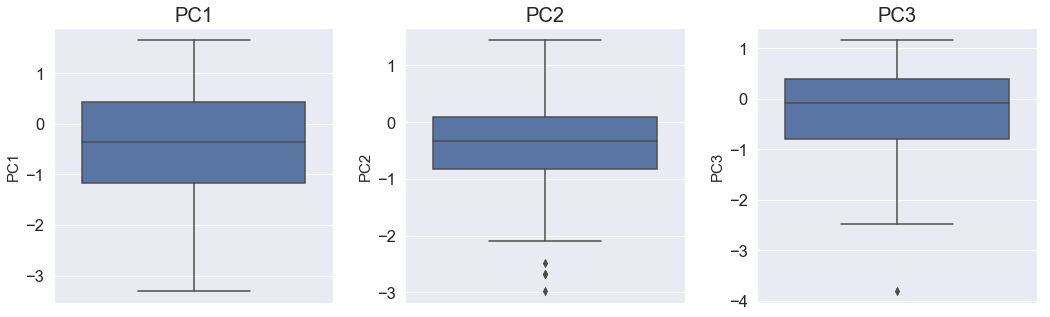

In [44]:
# Checking outliers throught box plots
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.tight_layout()
sns.set(font_scale = 1.5)
PC1 = sns.boxplot(y=help_ngo_pca_out['PC1'])
PC1.axes.set_title("PC1",fontsize=20)
PC1.set_ylabel("PC1",fontsize=15)

plt.subplot(1,3,2)
plt.tight_layout()
sns.set(font_scale = 1.5)
PC2 = sns.boxplot(y=help_ngo_pca_out['PC2'])
PC2.axes.set_title("PC2",fontsize=20)
PC2.set_ylabel("PC2",fontsize=15)


plt.subplot(1,3,3)
plt.tight_layout()

PC3 = sns.boxplot(y=help_ngo_pca_out['PC3'])
PC3.axes.set_title("PC3",fontsize=20)
PC3.set_ylabel("PC3",fontsize=15)

#### Least outliers were not treated on purpose as have to analyse to the least countries performing countries for focusing

In [45]:
#adding the country column
help_ngo_pca_out = pd.concat([help_ngo.loc[:,'country'], help_ngo_pca_out], axis=1)

In [46]:
help_ngo_pca_out

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.16,-0.96,0.33,0.28
1,Albania,-0.41,-0.69,-0.20,-0.43
2,Algeria,-0.22,1.44,0.03,-0.27
3,Angola,-0.71,NaN,NaN,0.26
4,Antigua and Barbuda,0.58,-0.60,0.09,-0.60
5,Argentina,-0.57,1.19,-1.38,0.83
6,Armenia,-0.89,-0.28,0.11,-0.79
7,Australia,0.40,-0.07,-2.07,-0.18
8,Austria,1.57,-0.74,-1.38,0.63
9,Azerbaijan,1.05,NaN,-0.62,-0.00


In [47]:
help_ngo_pca_out_len = len(help_ngo_pca_out)
help_ngo_pca_out_len

167

In [48]:
help_ngo_pca_out.isnull().sum()

country     0
PC1        19
PC2        19
PC3        19
PC4        19
dtype: int64

In [49]:
# Checking the % of NAN's
(help_ngo_pca_out.isnull().mean() * 100).round(2)

country     0.00
PC1        11.38
PC2        11.38
PC3        11.38
PC4        11.38
dtype: float64

In [50]:
# Dropping NAN's
help_ngo_pca_out_OT = help_ngo_pca_out.dropna()
help_ngo_pca_out_OT.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.16,-0.96,0.33,0.28
1,Albania,-0.41,-0.69,-0.20,-0.43
2,Algeria,-0.22,1.44,0.03,-0.27
4,Antigua and Barbuda,0.58,-0.60,0.09,-0.60
5,Argentina,-0.57,1.19,-1.38,0.83


In [51]:
help_ngo_pca_out_OT_len = len(help_ngo_pca_out_OT)
help_ngo_pca_out_OT_len 

115

In [52]:
(help_ngo_pca_out_OT.isnull().mean() * 100).round(2)

country    0.0
PC1        0.0
PC2        0.0
PC3        0.0
PC4        0.0
dtype: float64

In [53]:
round(((help_ngo_pca_out_OT_len/help_ngo_pca_out_len)*100),2)

68.86

### Decent amount of  69% data  is  maintaned for further analysis

## Hierarchical Clustering

In [54]:
# Importing Lib's for required operation
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [55]:
# Tweaks to get the data inline for hierarchical Clustering
help_ngo_pca_out_OT_HC = help_ngo_pca_out_OT.loc[:, help_ngo_pca_out_OT.columns != 'country']
help_ngo_pca_out_OT_HC.head()

,PC1,PC2,PC3,PC4
0,-2.16,-0.96,0.33,0.28
1,-0.41,-0.69,-0.20,-0.43
2,-0.22,1.44,0.03,-0.27
4,0.58,-0.60,0.09,-0.60
5,-0.57,1.19,-1.38,0.83


In [56]:
# Indexing for future operations
help_ngo_pca_out_OT_HC_indexed = help_ngo_pca_out_OT_HC.reset_index()
help_ngo_pca_out_OT_HC_indexed.head()

,index,PC1,PC2,PC3,PC4
0,0,-2.16,-0.96,0.33,0.28
1,1,-0.41,-0.69,-0.20,-0.43
2,2,-0.22,1.44,0.03,-0.27
3,4,0.58,-0.60,0.09,-0.60
4,5,-0.57,1.19,-1.38,0.83


In [57]:
# INdexing the main data set
help_ngo_index = help_ngo.reset_index()

### Merging original dataset and dataset obtained after PCA and "outlier treatment" to remove the outlier dirt for better clustering

In [58]:
help_ngo_pca_out_OT_HC_fn = help_ngo_pca_out_OT_HC_indexed.merge(help_ngo_index,on='index',how='inner')

In [59]:
help_ngo_pca_out_OT_HC_fn

,index,PC1,PC2,PC3,PC4,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,exp_imp_ratio
0,0,-2.16,-0.96,0.33,0.28,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0.22
1,1,-0.41,-0.69,-0.20,-0.43,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0.58
2,2,-0.22,1.44,0.03,-0.27,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,1.22
3,4,0.58,-0.60,0.09,-0.60,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0.77
4,5,-0.57,1.19,-1.38,0.83,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,1.18
5,6,-0.89,-0.28,0.11,-0.79,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0.46
6,7,0.40,-0.07,-2.07,-0.18,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0.95
7,8,1.57,-0.74,-1.38,0.63,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1.07
8,10,0.31,-0.69,-0.79,-0.37,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,0.80
9,12,-1.54,0.60,-0.09,-1.13,Bangladesh,49.4,16.0,3.52,21.8,2440,7.140,70.4,2.33,758,0.73


In [60]:
# Taking only necessay columns 
help_ngo_pca_out_OT_HC_fnl = help_ngo_pca_out_OT_HC_fn[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation','life_expec', 'total_fer', 'gdpp','exp_imp_ratio']]

In [61]:
help_ngo_pca_out_OT_HC_fnl

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,exp_imp_ratio
0,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0.22
1,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0.58
2,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,1.22
3,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0.77
4,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,1.18
5,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0.46
6,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0.95
7,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1.07
8,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,0.80
9,49.4,16.0,3.52,21.8,2440,7.140,70.4,2.33,758,0.73


In [62]:
help_ngo_pca_out_OT_HC_fnl.shape

(115, 10)

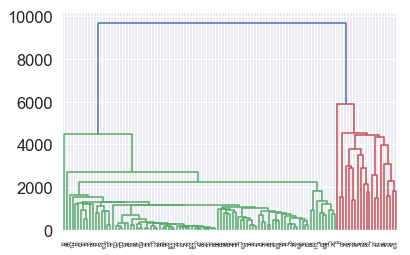

In [63]:
# single method hierarichal clustering plot
mergings = linkage(help_ngo_pca_out_OT_HC_fnl, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

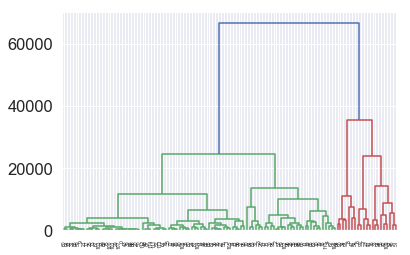

In [64]:
# complete method hierarichal clustering plot
mergings = linkage(help_ngo_pca_out_OT_HC_fnl, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

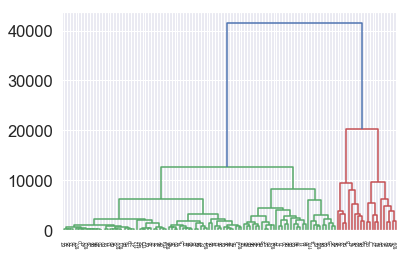

In [65]:
# AVERAGE method hierarichal clustering plot
mergings = linkage(help_ngo_pca_out_OT_HC_fnl, method = "average", metric='euclidean')
dendrogram(mergings)
plt.show()

### 4 CLUSTERS CHOSEN

In [66]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
help_ngo_pca_out_OT_HC_fnl_clustered = pd.concat([help_ngo_pca_out_OT_HC_fnl, clusterCut], axis=1)
help_ngo_pca_out_OT_HC_fnl_clustered.columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation','life_expec', 'total_fer', 'gdpp','exp_imp_ratio','cluster_id']

In [67]:
help_ngo_pca_out_OT_HC_fnl_clustered.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,exp_imp_ratio,cluster_id
0,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0.22,0
1,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0.58,0
2,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,1.22,1
3,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0.77,1
4,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,1.18,1
5,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0.46,0
6,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0.95,2
7,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1.07,2
8,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,0.80,3
9,49.4,16.0,3.52,21.8,2440,7.140,70.4,2.33,758,0.73,0


### Plotting the Bar Plots to analyse which contries need the focus the most

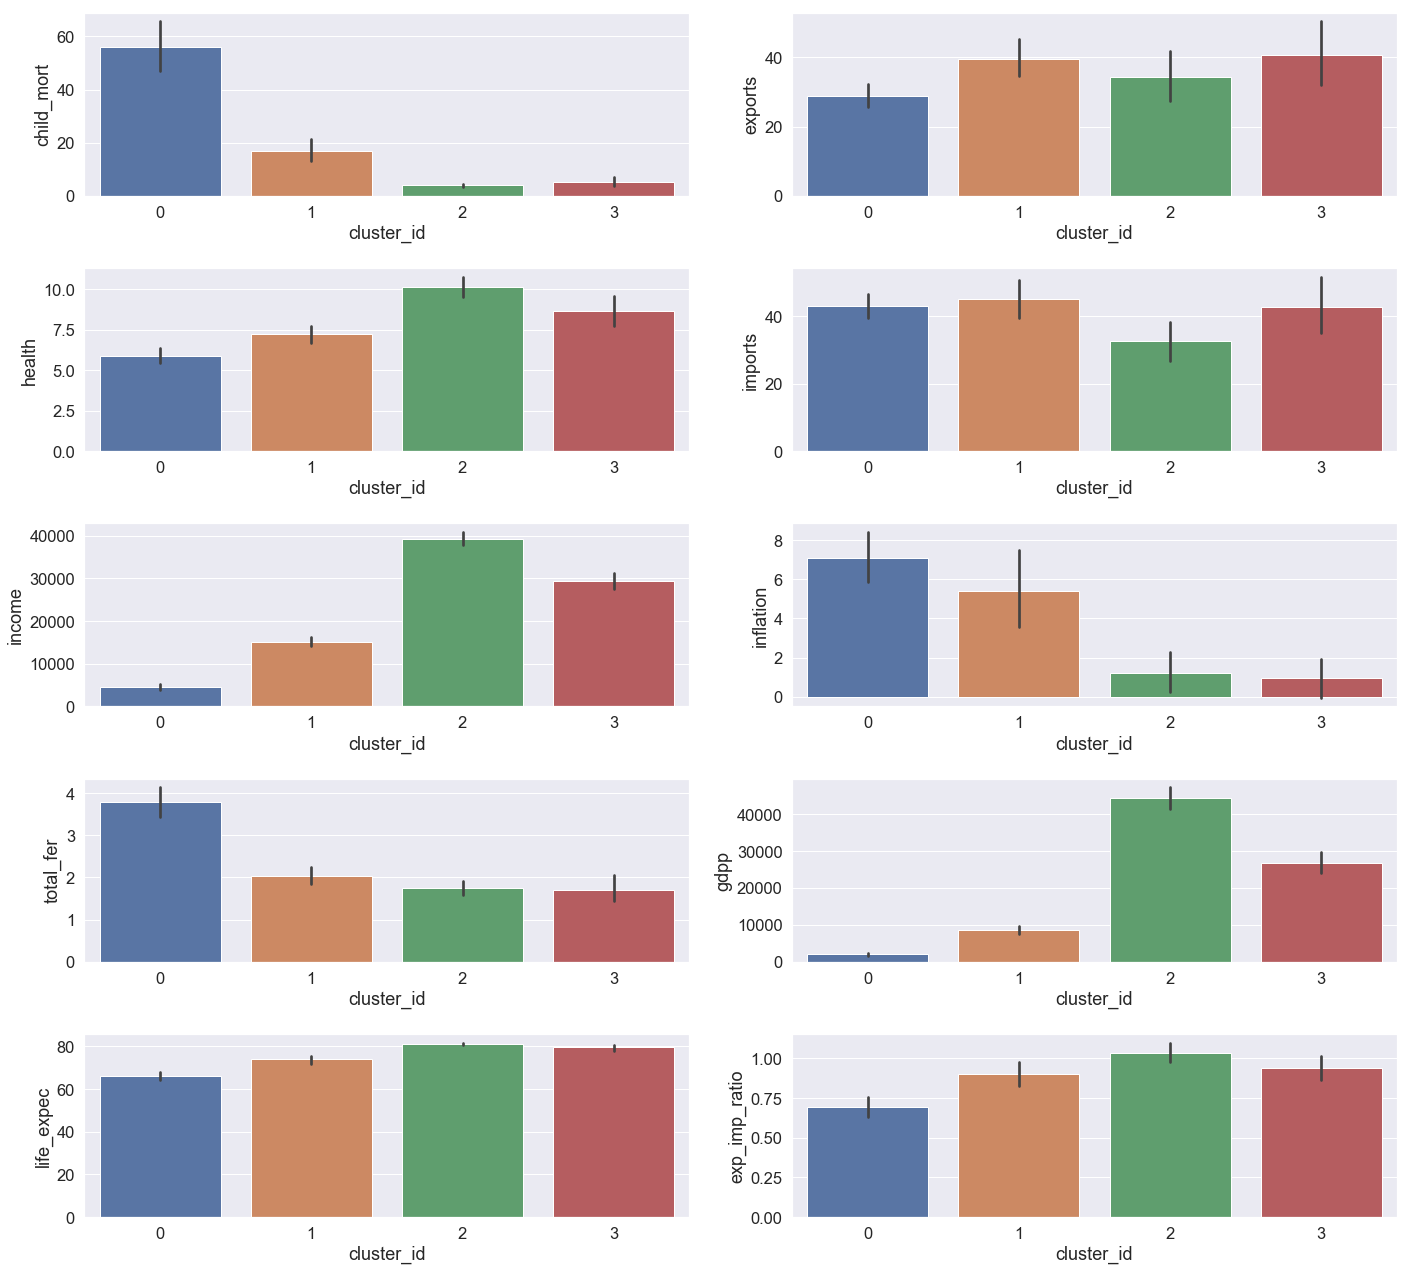

In [68]:
plt.figure(figsize=(20,18))
plt.subplot(5,2,1)
plt.tight_layout()
sns.barplot(x=help_ngo_pca_out_OT_HC_fnl_clustered.cluster_id, y=help_ngo_pca_out_OT_HC_fnl_clustered.child_mort,estimator=np.mean)


plt.subplot(5,2,2)
plt.tight_layout()
sns.barplot(x=help_ngo_pca_out_OT_HC_fnl_clustered.cluster_id, y=help_ngo_pca_out_OT_HC_fnl_clustered.exports,estimator=np.mean)


plt.subplot(5,2,3)
plt.tight_layout()
sns.barplot(x=help_ngo_pca_out_OT_HC_fnl_clustered.cluster_id, y=help_ngo_pca_out_OT_HC_fnl_clustered.health,estimator=np.mean)


plt.subplot(5,2,4)
plt.tight_layout()
sns.barplot(x=help_ngo_pca_out_OT_HC_fnl_clustered.cluster_id, y=help_ngo_pca_out_OT_HC_fnl_clustered.imports,estimator=np.mean)


plt.subplot(5,2,5)
plt.tight_layout()
sns.barplot(x=help_ngo_pca_out_OT_HC_fnl_clustered.cluster_id, y=help_ngo_pca_out_OT_HC_fnl_clustered.income,estimator=np.mean)


plt.subplot(5,2,6)
plt.tight_layout()
sns.barplot(x=help_ngo_pca_out_OT_HC_fnl_clustered.cluster_id, y=help_ngo_pca_out_OT_HC_fnl_clustered.inflation,estimator=np.mean)


plt.subplot(5,2,7)
plt.tight_layout()
sns.barplot(x=help_ngo_pca_out_OT_HC_fnl_clustered.cluster_id, y=help_ngo_pca_out_OT_HC_fnl_clustered.total_fer,estimator=np.mean)

plt.subplot(5,2,8)
plt.tight_layout()
sns.barplot(x=help_ngo_pca_out_OT_HC_fnl_clustered.cluster_id, y=help_ngo_pca_out_OT_HC_fnl_clustered.gdpp,estimator=np.mean)

plt.subplot(5,2,9)
plt.tight_layout()
sns.barplot(x=help_ngo_pca_out_OT_HC_fnl_clustered.cluster_id, y=help_ngo_pca_out_OT_HC_fnl_clustered.life_expec,estimator=np.mean)

plt.subplot(5,2,10)
plt.tight_layout()
sns.barplot(x=help_ngo_pca_out_OT_HC_fnl_clustered.cluster_id, y=help_ngo_pca_out_OT_HC_fnl_clustered.exp_imp_ratio,estimator=np.mean)
plt.show()

### Cluster 0 countries need the most when compared to others as it's evidnet from thier economical standards and health standards 

### Who are these cluser 0 countries??Let's see

In [69]:
help_ngo_pca_out_OT_HC_fnl_clustered = help_ngo_pca_out_OT_HC_fnl_clustered.reset_index()
help_ngo_pca_out_OT_HC_fnl_clustered

,index,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,exp_imp_ratio,cluster_id
0,0,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0.22,0
1,1,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0.58,0
2,2,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,1.22,1
3,3,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0.77,1
4,4,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,1.18,1
5,5,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0.46,0
6,6,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0.95,2
7,7,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1.07,2
8,8,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,0.80,3
9,9,49.4,16.0,3.52,21.8,2440,7.140,70.4,2.33,758,0.73,0


In [70]:
help_ngo_pca_out_OT_HC_fnl_clustered['country'] = help_ngo_pca_out_OT_HC_fn['country']

In [71]:
HC_output = help_ngo_pca_out_OT_HC_fnl_clustered[help_ngo_pca_out_OT_HC_fnl_clustered['cluster_id'] == 0][['cluster_id','country']]

In [72]:
HC_output.head()

,cluster_id,country
0,0,Afghanistan
1,0,Albania
5,0,Armenia
9,0,Bangladesh
12,0,Belize


In [73]:
HC_output.shape

(62, 2)

### These are the cluster 0 countries whom HELP International has to focus to achieve their purpose

In [74]:
list(HC_output.country)

['Afghanistan',
 'Albania',
 'Armenia',
 'Bangladesh',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Cape Verde',
 'Central African Republic',
 'China',
 'Comoros',
 "Cote d'Ivoire",
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eritrea',
 'Fiji',
 'Gambia',
 'Georgia',
 'Ghana',
 'Guatemala',
 'Guinea-Bissau',
 'India',
 'Jamaica',
 'Jordan',
 'Kenya',
 'Kiribati',
 'Lao',
 'Madagascar',
 'Malawi',
 'Mali',
 'Morocco',
 'Mozambique',
 'Namibia',
 'Nepal',
 'Niger',
 'Pakistan',
 'Paraguay',
 'Peru',
 'Philippines',
 'Rwanda',
 'Samoa',
 'Senegal',
 'Solomon Islands',
 'Sri Lanka',
 'Sudan',
 'Tajikistan',
 'Tanzania',
 'Togo',
 'Tonga',
 'Tunisia',
 'Uganda',
 'Ukraine',
 'Uzbekistan',
 'Vanuatu',
 'Yemen',
 'Zambia']

### Hierichal was purposefully chosen before K means as we can have an idea of the initail number of clusters required for K means before plotting the elbow curve

## K Means clustering

In [75]:
# To perform KMeans clustering 
from sklearn.cluster import KMeans

### Hopkins Statistics

In [76]:

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [77]:
# Dropping the country column and adding the index
help_ngo_pca_out_OT_KM = help_ngo_pca_out_OT.loc[:, help_ngo_pca_out_OT.columns != 'country']
help_ngo_pca_out_OT_KM_indexed = help_ngo_pca_out_OT_KM.reset_index()
help_ngo_pca_out_OT_KM_indexed.head()

,index,PC1,PC2,PC3,PC4
0,0,-2.16,-0.96,0.33,0.28
1,1,-0.41,-0.69,-0.20,-0.43
2,2,-0.22,1.44,0.03,-0.27
3,4,0.58,-0.60,0.09,-0.60
4,5,-0.57,1.19,-1.38,0.83


In [78]:
help_ngo_index = help_ngo.reset_index()

### Same as in hierarchal clustering done before we merge outliered dataset with orignial dataset to have better clustering performance

In [79]:
help_ngo_pca_out_OT_KM_fn = help_ngo_pca_out_OT_KM_indexed.merge(help_ngo_index,on='index',how='inner')

In [80]:
help_ngo_pca_out_OT_KM_fn.head()

,index,PC1,PC2,PC3,PC4,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,exp_imp_ratio
0,0,-2.16,-0.96,0.33,0.28,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0.22
1,1,-0.41,-0.69,-0.20,-0.43,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.58
2,2,-0.22,1.44,0.03,-0.27,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1.22
3,4,0.58,-0.60,0.09,-0.60,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0.77
4,5,-0.57,1.19,-1.38,0.83,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,1.18


In [81]:
help_ngo_pca_out_OT_KM_fn.shape

(115, 16)

In [82]:
# Squeezing only the required variables for K Means Clustering
help_ngo_pca_out_OT_KM_fnl = help_ngo_pca_out_OT_KM_fn[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation','life_expec', 'total_fer', 'gdpp','exp_imp_ratio']]

In [83]:
help_ngo_pca_out_OT_KM_fnl.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,exp_imp_ratio
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0.22
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.58
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1.22
3,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0.77
4,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,1.18


In [84]:
hopkins(help_ngo_pca_out_OT_KM_fnl)

0.9240600247279094

### 92% of hopkins statistics was obtained

## Silhouette Analysis

In [85]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(help_ngo_pca_out_OT_KM_fnl)
    sse_.append([k, silhouette_score(help_ngo_pca_out_OT_KM_fnl, kmeans.labels_)])

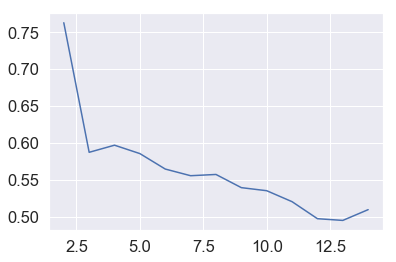

In [86]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

### Sum of squared distances

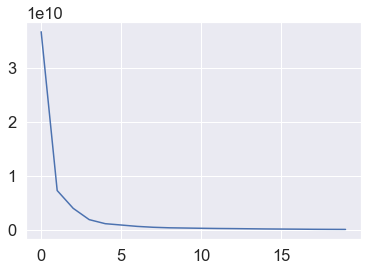

In [87]:
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=100)
    model_clus.fit(help_ngo_pca_out_OT_KM_fnl)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

### Number of clusters was taken as 4 from the above Elbow cure 

In [88]:
# Kmeans with K=4
model_clus2 = KMeans(n_clusters = 4, max_iter=100)
model_clus2.fit(help_ngo_pca_out_OT_KM_fnl)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [89]:
model_clus2.labels_

array([0, 0, 2, 2, 2, 0, 3, 3, 1, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0,
       0, 3, 0, 0, 2, 0, 2, 0, 2, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 3, 3, 0,
       0, 3, 0, 1, 2, 0, 0, 3, 0, 2, 1, 3, 0, 3, 0, 0, 0, 0, 2, 2, 2, 2,
       0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 2, 1, 2, 0, 0,
       0, 2, 1, 0, 2, 1, 1, 0, 2, 0, 2, 3, 0, 0, 2, 0, 0, 2, 2, 0, 0, 3,
       2, 0, 0, 0, 0])

In [90]:
help_ngo_pca_out_OT_KM_fnl.index = pd.RangeIndex(len(help_ngo_pca_out_OT_KM_fnl.index))
help_ngo_pca_out_OT_KM_fnl_kmeans = pd.concat([help_ngo_pca_out_OT_KM_fnl, pd.Series(model_clus2.labels_)], axis=1)

In [91]:
help_ngo_pca_out_OT_KM_fnl_kmeans.columns

Index([   'child_mort',       'exports',        'health',       'imports',
              'income',     'inflation',    'life_expec',     'total_fer',
                'gdpp', 'exp_imp_ratio',               0],
      dtype='object')

In [92]:
help_ngo_pca_out_OT_KM_fnl_kmeans.columns=['child_mort', 'exports', 'health', 'imports', 'income', 'inflation','life_expec', 'total_fer', 'gdpp','exp_imp_ratio','cluster_id']

### Plotting the Bar Plots to analyse which contries need the focus the most

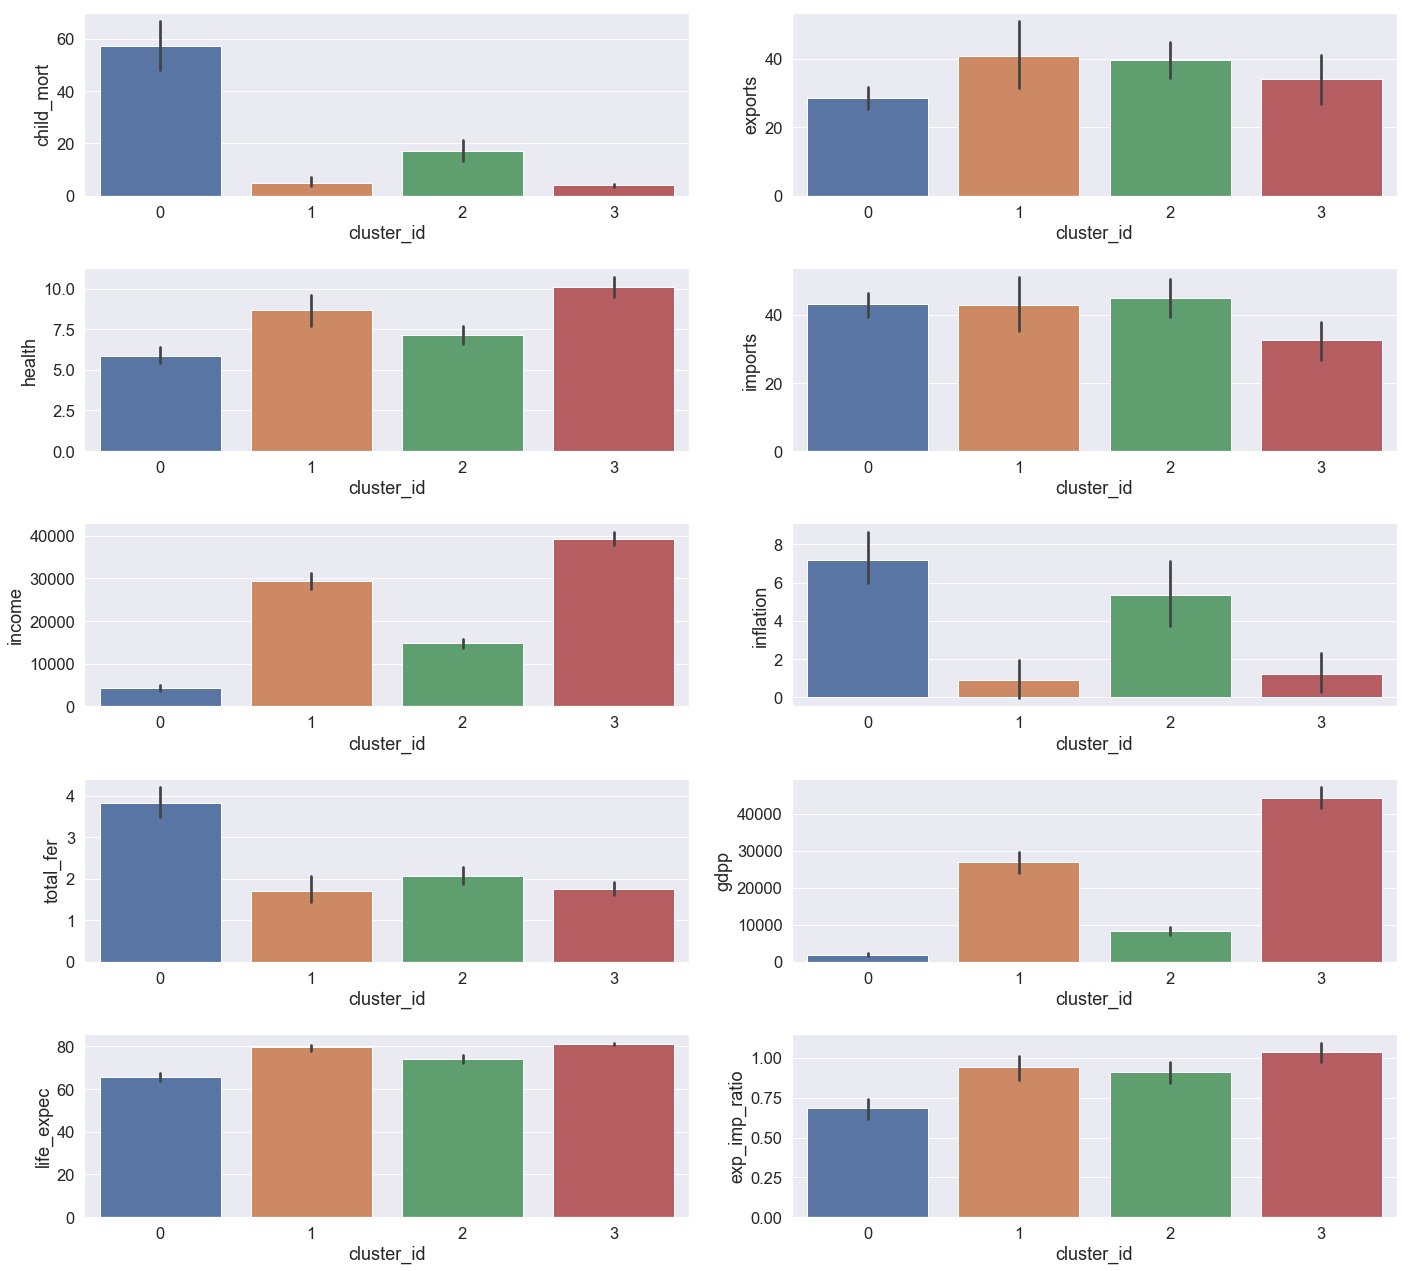

In [93]:
plt.figure(figsize=(20,18))
plt.subplot(5,2,1)
plt.tight_layout()
sns.barplot(x=help_ngo_pca_out_OT_KM_fnl_kmeans.cluster_id, y=help_ngo_pca_out_OT_KM_fnl_kmeans.child_mort,estimator=np.mean)


plt.subplot(5,2,2)
plt.tight_layout()
sns.barplot(x=help_ngo_pca_out_OT_KM_fnl_kmeans.cluster_id, y=help_ngo_pca_out_OT_KM_fnl_kmeans.exports,estimator=np.mean)


plt.subplot(5,2,3)
plt.tight_layout()
sns.barplot(x=help_ngo_pca_out_OT_KM_fnl_kmeans.cluster_id, y=help_ngo_pca_out_OT_KM_fnl_kmeans.health,estimator=np.mean)


plt.subplot(5,2,4)
plt.tight_layout()
sns.barplot(x=help_ngo_pca_out_OT_KM_fnl_kmeans.cluster_id, y=help_ngo_pca_out_OT_KM_fnl_kmeans.imports,estimator=np.mean)


plt.subplot(5,2,5)
plt.tight_layout()
sns.barplot(x=help_ngo_pca_out_OT_KM_fnl_kmeans.cluster_id, y=help_ngo_pca_out_OT_KM_fnl_kmeans.income,estimator=np.mean)


plt.subplot(5,2,6)
plt.tight_layout()
sns.barplot(x=help_ngo_pca_out_OT_KM_fnl_kmeans.cluster_id, y=help_ngo_pca_out_OT_KM_fnl_kmeans.inflation,estimator=np.mean)


plt.subplot(5,2,7)
plt.tight_layout()
sns.barplot(x=help_ngo_pca_out_OT_KM_fnl_kmeans.cluster_id, y=help_ngo_pca_out_OT_KM_fnl_kmeans.total_fer,estimator=np.mean)

plt.subplot(5,2,8)
plt.tight_layout()
sns.barplot(x=help_ngo_pca_out_OT_KM_fnl_kmeans.cluster_id, y=help_ngo_pca_out_OT_KM_fnl_kmeans.gdpp,estimator=np.mean)

plt.subplot(5,2,9)
plt.tight_layout()
sns.barplot(x=help_ngo_pca_out_OT_KM_fnl_kmeans.cluster_id, y=help_ngo_pca_out_OT_KM_fnl_kmeans.life_expec,estimator=np.mean)

plt.subplot(5,2,10)
plt.tight_layout()
sns.barplot(x=help_ngo_pca_out_OT_KM_fnl_kmeans.cluster_id, y=help_ngo_pca_out_OT_KM_fnl_kmeans.exp_imp_ratio,estimator=np.mean)
plt.show()

### Cluster 0 countries need the most when compared to others as it's evidnet from thier economical standards and health standards 

### Who are these Cluster 0 countries??

In [94]:
help_ngo_pca_out_OT_KM_fnl_kmeans['country'] = help_ngo_pca_out_OT_KM_fn['country']

In [95]:
KM_output = help_ngo_pca_out_OT_KM_fnl_kmeans[help_ngo_pca_out_OT_KM_fnl_kmeans['cluster_id'] == 0][['cluster_id','country']]

In [96]:
KM_output

,cluster_id,country
0,0,Afghanistan
1,0,Albania
5,0,Armenia
9,0,Bangladesh
12,0,Belize
13,0,Benin
14,0,Bhutan
15,0,Bolivia
16,0,Bosnia and Herzegovina
20,0,Burkina Faso


In [97]:
KM_output.shape

(60, 2)

In [98]:
list(KM_output.country)

['Afghanistan',
 'Albania',
 'Armenia',
 'Bangladesh',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Cape Verde',
 'Central African Republic',
 'China',
 'Comoros',
 "Cote d'Ivoire",
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eritrea',
 'Fiji',
 'Gambia',
 'Georgia',
 'Ghana',
 'Guatemala',
 'Guinea-Bissau',
 'India',
 'Jamaica',
 'Jordan',
 'Kenya',
 'Kiribati',
 'Lao',
 'Madagascar',
 'Malawi',
 'Mali',
 'Morocco',
 'Mozambique',
 'Namibia',
 'Nepal',
 'Niger',
 'Pakistan',
 'Paraguay',
 'Philippines',
 'Rwanda',
 'Samoa',
 'Senegal',
 'Solomon Islands',
 'Sri Lanka',
 'Sudan',
 'Tajikistan',
 'Tanzania',
 'Togo',
 'Tonga',
 'Uganda',
 'Ukraine',
 'Uzbekistan',
 'Vanuatu',
 'Yemen',
 'Zambia']

## It is evident that in both hierarchal and Kmeans Clustering we've seen the almost same countries require the focus the most from HELP International

## Except Peru and Tunisia all the countries in both the clusters are  same. We recommend the organisation to consider all the countries which include Peru and Tunisia as well to focus